In [178]:
# Ex1- Quais colunas temos na base de salarios?

import pandas as pd

df = pd.read_csv('Salaries.csv')
print(list(df.columns.values))

['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency', 'Status']


In [179]:
# Ex2- Qual é a coluna de salario base?

print(df.BasePay)

0         167411.18
1         155966.02
2         212739.13
3          77916.00
4         134401.60
            ...    
148649         0.00
148650          NaN
148651          NaN
148652          NaN
148653         0.00
Name: BasePay, Length: 148654, dtype: float64


In [180]:
# Ex3- Qual é o salário médio?

teste = df.BasePay
media = teste.mean()
print(media)

66325.4488404877


In [181]:
# Ex4- Qual é o salário máximo?

SalarioMax = teste.max()
print(SalarioMax)

319275.01


In [182]:
# Ex5- Qual é o emprego do JOSEPH DRISCOLL?

filtro = df.loc[(df['EmployeeName'] == 'JOSEPH DRISCOLL')].JobTitle
print(filtro)

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object


In [183]:
# Ex6- Qual o nome da pessoa que tem o maior salário?

filtro2 = df.loc[(df['BasePay'] == SalarioMax)].EmployeeName
print(filtro2)

72925    Gregory P Suhr
Name: EmployeeName, dtype: object


In [184]:
# Ex7- Qual é a média salárial por ano?

agp_df = df.groupby(['Year']).agg({'BasePay': 'mean'})  
agp_df.reset_index(inplace=True)
agp_df = agp_df.rename({'BasePay': 'fl_media'}, axis = 1)
agp_df

,Year,fl_media
0,2011,63595.956517
1,2012,65436.406857
2,2013,69630.030216
3,2014,66564.421924


In [185]:
# Ex8- Quais são os cinco empregos mais comuns (JobTitle)?

agp_df2 = df['JobTitle'].value_counts()
agp_df2 = pd.DataFrame(agp_df2)
 
agp_df2.reset_index(inplace=True)
agp_df2 = agp_df2.rename({'JobTitle': 'quantidade', 'index': 'jobT'}, axis = 1)

agp_df2 = agp_df2.sort_values('quantidade', ascending=False)

agp_df2 = agp_df2.head(5)
agp_df2 

,jobT,quantidade
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421


## O que é correlação? #

A análise de correlação é uma forma descritiva que mede se há e qual o grau de dependência entre variáveis, ou seja, o quanto uma variável interfere em outra, lembrando que essa relação de dependência pode ou não ser causal. Essa medida de grau de relação é medida através de coeficientes. No caso deste post, nós vamos focar no coeficiente de Pearson.

O coeficiente de Pearson, também chamado de “coeficiente de correlação produto-momento” ou chamado de “ρ de Pearson”, mede o grau de correlação através do cálculo de direção positiva ou negativa. Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

A análise de correlação vai retornar três possíveis cenários: (1) correlação positiva; (2) correlação negativa; e (3) não há correlação.

* Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;
* Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;
* Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.

Como podemos interpretar os valores*  que ρ pode assumir?

ρ = 0,9 a 1 : correlação muito forte; 

ρ = 0,7 a 09 : correlação forte;

ρ = 0,5 a 0,7 : correlação moderada;

ρ = 0,3 a 0,5 : correlação fraca;

ρ = 0 a 0,3 : não possui correlação.

_* Valores positivos ou negativos_

Em python, para verificar a correlação usamos a biblioteca _seaborn_. Para a análise de correlação vamos utilizar a função .corr(). Para visualizarmos a matriz de correlação, vamos utilizar a função _.heatmap()_ do pacote seaborn, essa função vai nos retornar uma forma gráfica da matriz com uma escala de cor em conjunto com uma escala numérica, as quais vão indicar o grau medido entre as variáveis.

<Axes: >

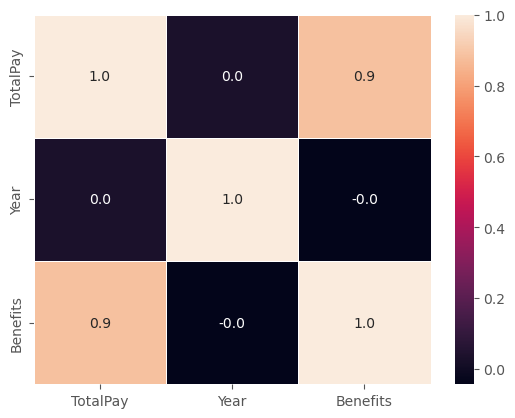

In [186]:
#Ex9 - Existe correlação entre ano e salário?
import seaborn as sn

df_corr = df[['TotalPay', 'Year', 'Benefits']].copy()
df_corr.head()

# Análise de correlação

correlation = df_corr.corr()
correlation

# plot da matriz de correlação

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

# Neste caso não temos correlação.


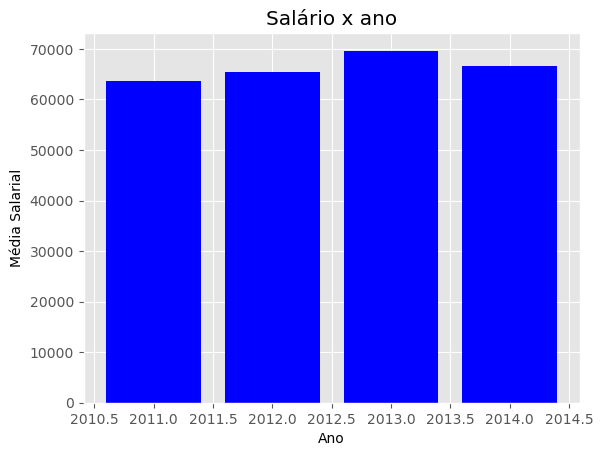

In [203]:
#Ex9.2 - Soma de salarios por ano:

import matplotlib.pyplot as plt

Year = agp_df['Year']
fl_media = agp_df['fl_media']

plt.bar(Year, fl_media, color = 'blue')

plt.ylabel('Média Salarial')
plt.xlabel('Ano')
plt.title('Salário x ano')

plt.show()

In [188]:
# Ex10- Como criar um outro dataframe selecionando apenas algumas colunas do dataframe original?

df_copy = df[['Year', 'Notes', 'Agency', 'Status']].copy()